# **Aprendizaje no supervisado**
## **Análisis de Componenetes Principales**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import itertools

In [11]:
class PCA:
    '''
    Implementación de una clase para Análisis de Componentes Principales
    '''

    def __init__(self, n_componentes = 2):
        """
        Constructor de objetos PCA

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas
            n_componentes (int): Número de componentes a utilizar
        """

        self.n_componentes = n_componentes
        self.valores_propios = None
        self.vectores_propios = None

    def estandarizar(self, data):
        """
        Función para estandarizar datos númericos (media 0 y varianza 1)

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas

        Return:
            z (numpy array): Datos estandarizados
        """

        #Se resta la media de cada caracteristica a cada caracteristica y se divide con la DS de cada caracteristica
        z = (data - np.mean(data, axis = 0)) / (np.std(data, axis = 0))
        return z

    def calc_matriz_covarianza(self):
        """
        Función para calcular la matriz de covarianza de un numpy array

        Return:
            covmat (numpy array): Matriz de covarianza
        """

        covmat = np.cov(self.datos_estandarizados.T)

        return covmat

    def valores_vectores_propios(self, covmat):
        #Se calculan los valores y vectores propios de la matrix de covarianza
        valores_propios, vectores_propios = np.linalg.eig(covmat)

        return valores_propios, vectores_propios

    def vector_caracteristicas(self, valores_propios, vectores_propios):
        #Se seleccionan los indices de los n_componentes con los mayores valores propios
        n_cols = np.argsort(valores_propios)[::-1][:self.n_componentes]

        #Se seleccionan los n_componentes vectores propios con mayor poder explicativo
        vector_caracteristica = vectores_propios[:,n_cols]
        print("Caracteristicas seleccionadas para el vector de caracteristicas")
        print(n_cols)
        return vector_caracteristica

    def proyectar(self, vectores_caracteristica):
        """
        Función para proyectar los datos originales sobre el espacio de los componentes de PCA

        Parametros:
            vectores_caracteristica (numpy array): Vector de caracteristica

        Return:
            P (numpy array): Datos originales proyectados al vector de caracteristicas
        """

        P = np.dot(self.datos_estandarizados, vectores_caracteristica)
        return P

    def dibujar(self, titulo, features, target, pca_data):
        fig ,ax = plt.subplots(1, 1, figsize=(10,6))

                #chart tags
        ax.set_title(titulo)
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])

        #drawing the scatterplot
        sns.scatterplot(
            x = pca_data[:,0],
            y = pca_data[:,1],
            hue = target
        )

        print(pca_data.shape)
        sns.despine()
        plt.show()

    def run(self, data):

        self.n_muestras = data.shape[0]
        self.datos_estandarizados = self.estandarizar(data)

        covmat = self.calc_matriz_covarianza()

        self.valores_propios, self.vectores_propios = self.valores_vectores_propios(covmat)

        self.vector_caracteristica = self.vector_caracteristicas(self.valores_propios, self.vectores_propios)

        datos_proyectados = self.proyectar(self.vector_caracteristica)

        return datos_proyectados

In [12]:
#Se carga el DataSet
diabetes = datasets.load_diabetes()

data = diabetes.data
target = diabetes.target

In [13]:
#Experimento 1
pca = PCA()
datos_pca = pca.run(data)


Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


In [14]:
print("% de varianza descrita por cada caracteristica")
print(pca.valores_propios/np.sum(pca.valores_propios) * 100)

% de varianza descrita por cada caracteristica
[40.2421075  14.92319678 12.05966259  9.55476403  0.0856073   0.78320024
  6.62181391  4.33682036  6.02717076  5.36565652]


(442, 2)


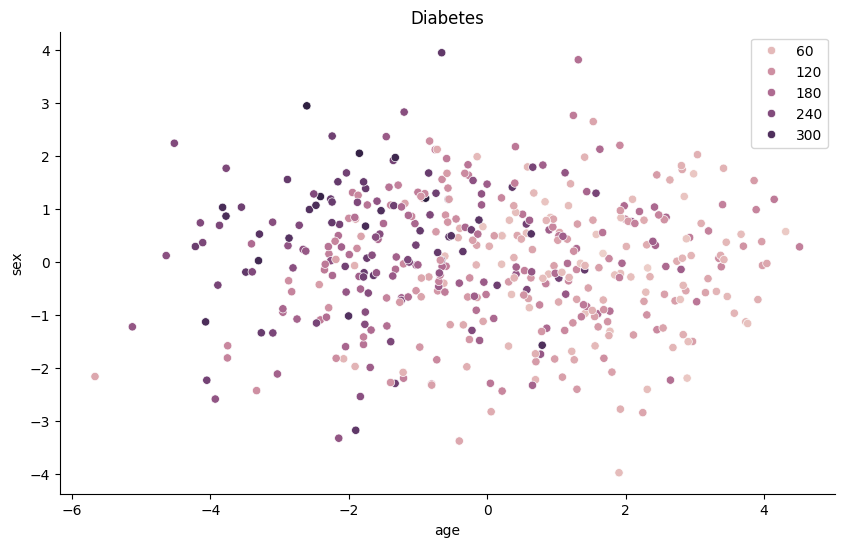

In [16]:
pca.dibujar("Diabetes", diabetes.feature_names[0:2], target, datos_pca)

##**Taller # 1**

* Utilizar dataset blue jays
* Realizar analisis bivariado todos contra todos tal como se explicó
* Interpretar resultados del analisis bivariado
* Calcule la matriz de covarianza y sus valores y vectores propios (discuta los resultados con su grupo)
* Determine cuantos y cuales componentes son necesarios para describir el 90% de la varianza de los datos

In [19]:
# Cargamos el Dataset
file_path = "/content/blue_jays.csv"
df = pd.read_csv(file_path)

df_num = df.select_dtypes(include=[np.number]) # Selecciona solo las columnas con valores númericos

### Se crean las gráficas para el análisis Bivariado

In [20]:
# Permite crear combinaciones entre las columnas
columnas = df_num.columns
combinaciones = list(itertools.combinations(columnas, 2)) # Iteraciones con valores no repetidos



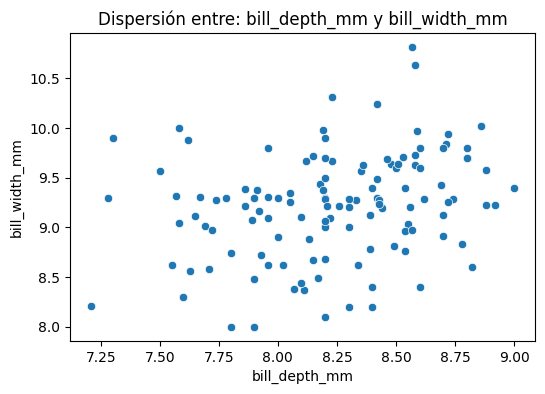

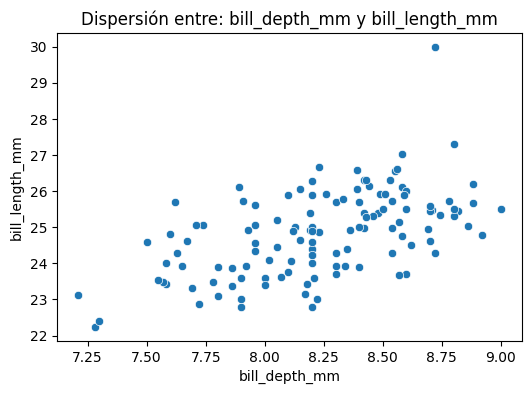

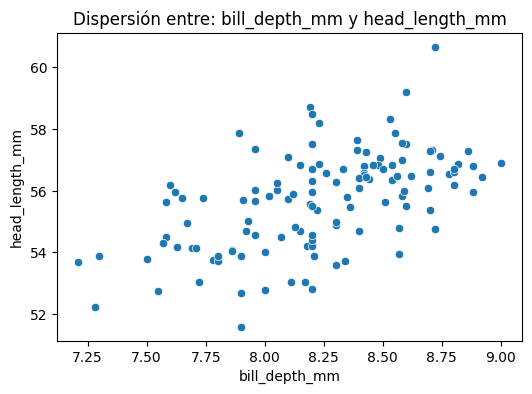

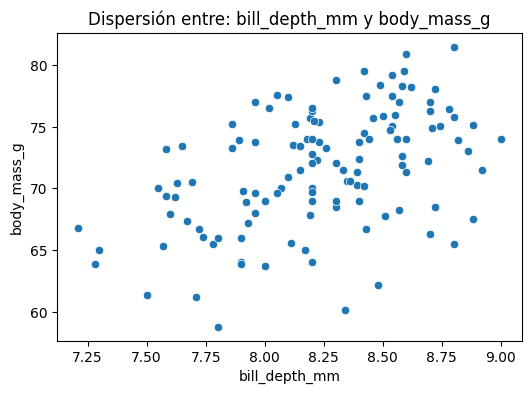

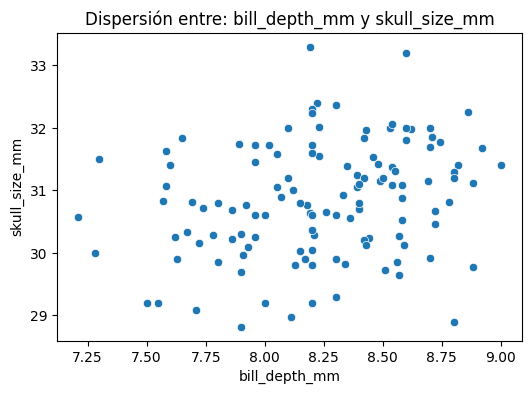

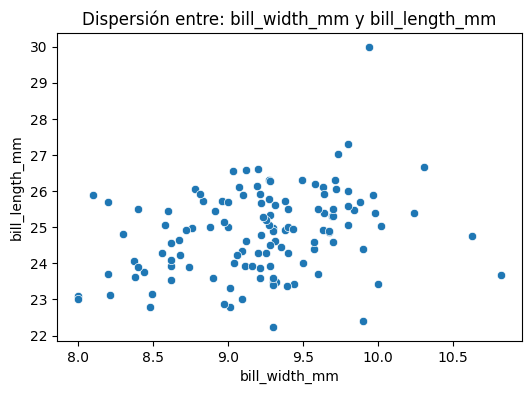

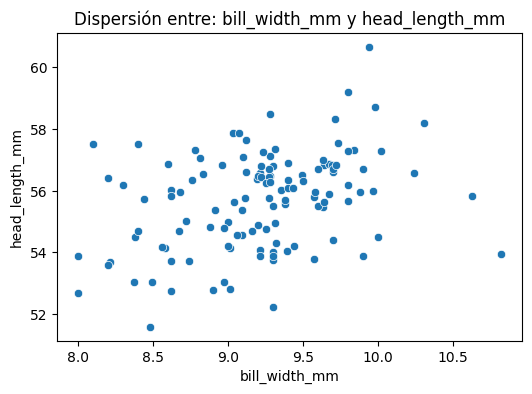

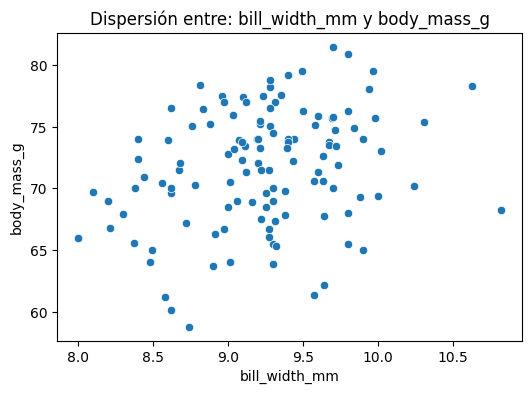

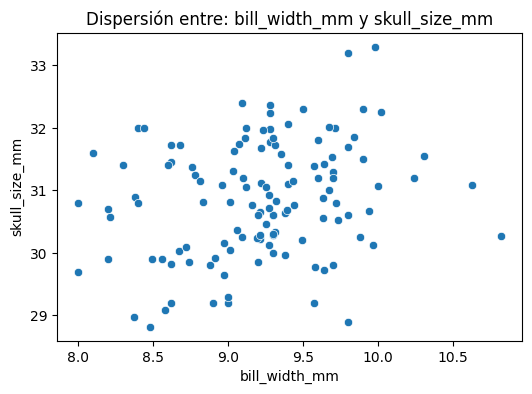

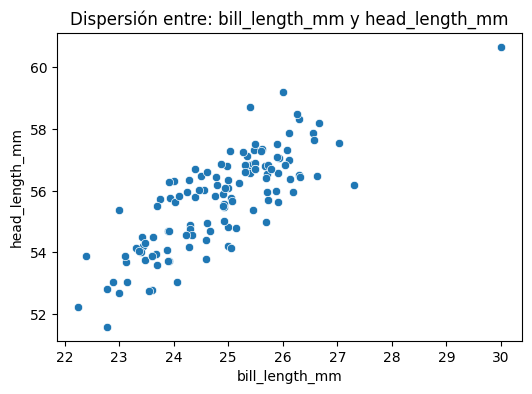

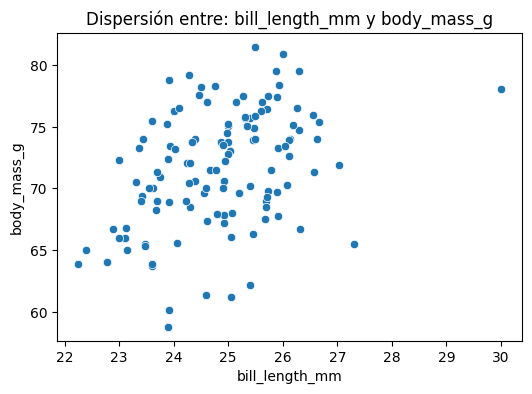

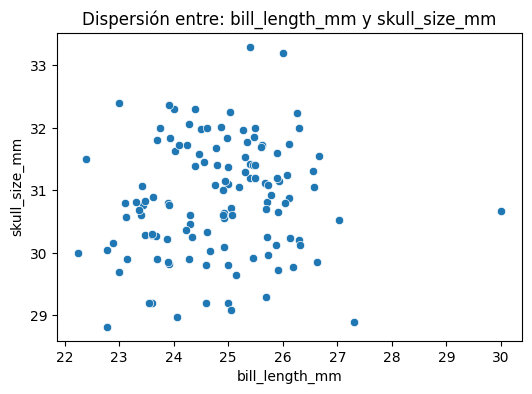

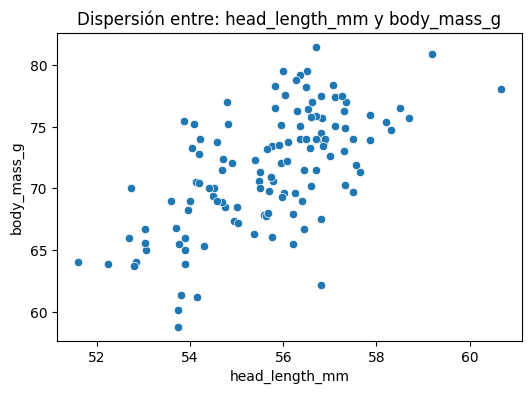

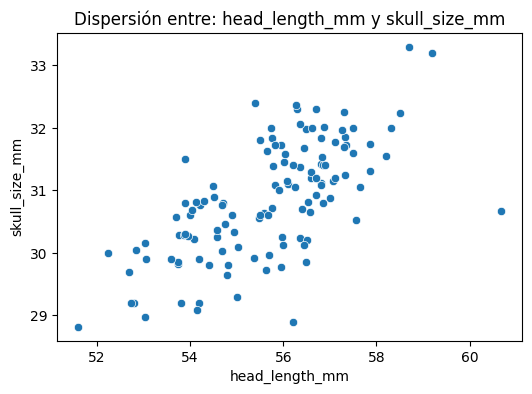

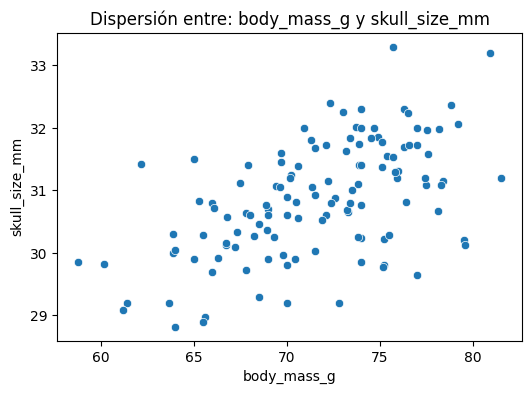

In [44]:
# Se imprimen los resultados de las graficas
for col_x, col_y in combinaciones:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_num[col_x], y=df_num[col_y])
    plt.title(f"Dispersión entre: {col_x} y {col_y}")
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.show()

### Analisis de gráficas

Los gráficos PCA anteriores se crearon con el fin de analizar e interpretar aquellas columnas que se encuentran correlacionadas, los que nos permite tener en cuenta aquellos datos que son relevantes y aquellos que no tanto.

**Columnas con una mayor relación:**
1. Longitud del pico - Longitud de la cabeza
2. Longitud de la cabeza - Masa corporal
3. Longitud de la cabeza - Tamaño del cráneo
4. Longitud del pico - Masa corporal

**Columnas con una relación mediana:**
1. Profundidad del pico - longitud del pico
2. Longitud del pico - Longitud de la cabeza
3. Longitud del pico - Tamaño del cráneo
4. Ancho del pico - Longitud de la cabeza
5. Ancho del pico - Longitud del pico
6. Masa corporal - Tamaño del cráneo

**Columnas con poca relación:**
1. Profundidad del pico - Ancho del pico
2. Profundidad del pico - Masa corporal
3. Profundidad del pico - Tamaño del cráneo
4. Ancho del pico - Masa corporal
5. Ancho del pico - Tamaño del cráneo


### Se calcula la  matriz de Covarianza y sus Valores y Vectores propios

Se inicializa el PCA

In [43]:
pca = PCA()
datos_pca = pca.run(df_num)


Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


Calculo de la matriz de covarianza, valores y vectores propios

In [42]:
# Datos estandarizados
datos_estandarizados = pca.estandarizar(df_num.values)

# Matriz de la covarianza
pca.datos_estandarizados = datos_estandarizados  # Guardar los datos estandarizados en la instancia
matriz_covarianza = pca.calc_matriz_covarianza()

# Vectores propios
valores_propios, vectores_propios = pca.valores_vectores_propios(matriz_covarianza)



Se muestran resultados

In [41]:
# Resultados Matriz de Covarianza
print("Matriz de Covarianza:")
print(matriz_covarianza)

# Resultados Valores y Vectores Propios
print("\nValores Propios:")
print(valores_propios)

print("\nVectores Propios:")
print(vectores_propios)

Matriz de Covarianza:
[[1.00819672 0.27233231 0.55670766 0.56227686 0.476727   0.24871341]
 [0.27233231 1.00819672 0.29890052 0.36473353 0.2921213  0.2410161 ]
 [0.55670766 0.29890052 1.00819672 0.8215004  0.41318744 0.11355263]
 [0.56227686 0.36473353 0.8215004  1.00819672 0.63460408 0.6732668 ]
 [0.476727   0.2921213  0.41318744 0.63460408 1.00819672 0.55739457]
 [0.24871341 0.2410161  0.11355263 0.6732668  0.55739457 1.00819672]]

Valores Propios:
[3.27285944e+00 1.01155659e+00 8.13786358e-01 5.46814658e-01
 4.04161477e-01 1.80432307e-06]

Vectores Propios:
[[-3.96985691e-01 -3.42262537e-01  1.52675802e-01 -7.06649851e-01
  -4.50105291e-01  1.78260034e-04]
 [-2.81040838e-01 -4.49265410e-02 -9.58222042e-01 -2.83844499e-02
   1.56950604e-03  1.74613094e-04]
 [-4.20931181e-01 -5.44180448e-01  1.36291663e-01  4.39217464e-01
   1.41941341e-01  5.43184903e-01]
 [-5.23157620e-01  7.87571214e-03  1.40753884e-01  4.04039000e-01
  -1.31442872e-01 -7.25194925e-01]
 [-4.30888022e-01  2.77787878

Analisis porcentual de los resultados relevantes para determinar el 90% o más

In [40]:
pca = PCA()
datos_pca = pca.run(df_num)

# Calcular el porcentaje de varianza explicada por cada valor propio
porcentajes = (pca.valores_propios / np.sum(pca.valores_propios)) * 100
print("Porcentaje de varianza explicada por cada componente:")
print(porcentajes)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]
Porcentaje de varianza explicada por cada componente:
[5.41041805e+01 1.67222092e+01 1.34528368e+01 9.03948351e+00
 6.68126020e+00 2.98275630e-05]


Se hace la aproximación y se muestran resultados

In [39]:
varianza_acumulada = np.cumsum(porcentajes)

# Hace la aproximación al 100%
num_componentes = np.argmax(varianza_acumulada >= 99.9) + 1

# Mostrar los resultados
print("Porcentaje de varianza explicada por cada valor de la matriz:")
for i, (pct, var_acum) in enumerate(zip(porcentajes, varianza_acumulada), start=1):
    print(f"Valor {i}: Varianza Explicada = {pct:.2f}%, Varianza Acumulada = {var_acum:.2f}%")

print("\nNúmero total de componentes necesarios para aproximar el 100% de la varianza:", num_componentes)
print(f"Varianza total acumulada con estos valores: {varianza_acumulada[num_componentes - 1]:.2f}%")

Porcentaje de varianza explicada por cada valor de la matriz:
Valor 1: Varianza Explicada = 54.10%, Varianza Acumulada = 54.10%
Valor 2: Varianza Explicada = 16.72%, Varianza Acumulada = 70.83%
Valor 3: Varianza Explicada = 13.45%, Varianza Acumulada = 84.28%
Valor 4: Varianza Explicada = 9.04%, Varianza Acumulada = 93.32%
Valor 5: Varianza Explicada = 6.68%, Varianza Acumulada = 100.00%
Valor 6: Varianza Explicada = 0.00%, Varianza Acumulada = 100.00%

Número total de componentes necesarios para aproximar el 100% de la varianza: 5
Varianza total acumulada con estos valores: 100.00%
